# The Metabolic Disassembler

## Create a virtual environment in about 5 min.

In [0]:
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO


logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)


def install(
        chunk_size=4096,
        file_name="Miniconda3-4.7.12-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """

    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )

    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)

    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return

        logger.info("force re-install")

    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)

    logger.info("python version: {}".format(python_version))

    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)

    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')

    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')

    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python=={}".format(python_version),
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")

    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))

In [2]:
install(rdkit_version='2019.09.2.0', force=True)

add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-4.7.12-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2019.09.2 installation finished!


In [3]:
!pip install metadisassembler

     |████████████████████████████████| 931kB 4.9MB/s 
     |████████████████████████████████| 1.7MB 50.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1527322 sha256=4de7bd996e202cc83ed721aa6d84cafa114f069460abbed95f57849ad4722a5b
  Stored in directory: /root/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Created wheel for cairocffi: filename=cairocffi-1.1.0-cp36-none-any.whl size=88591 sha256=5a9bb686aae7d3c3579ade020741976705dca749e438d82a1f966212f33761c1
  Stored in directory: /root/.cache/pip/wheels/11/5e/47/167d9dfd5fa5850dd0cd3db80afe6db46e620edec3419dce5a
Successfully built networkx cairocffi
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx

In [0]:
import glob

from IPython.display import Image, display_png
from rdkit.Chem.Draw import IPythonConsole

import metadisassembler as medi

## Test1: [C05557 Isopenicillin N](https://www.genome.jp/dbget-bin/www_bget?C05557)
## Input a query by the KEGG compound identifier

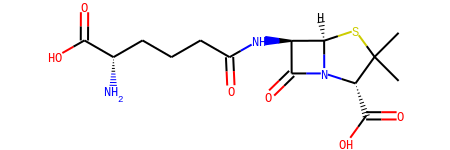

In [5]:
# Create an instance and input a query molecule

test1 = medi.MetaDisassembler()
test1.input_query('C05557')
test1.cpds[0].mol

In [6]:
# Disassemble the query molecule
# It takes about 30 sec.

test1.disassemble()

Finished.


True

In [7]:
# List output files

sorted(glob.glob('./output/' + test1.name + '/*'))

['./output/C05557/0.png',
 './output/C05557/1.png',
 './output/C05557/10.png',
 './output/C05557/11.png',
 './output/C05557/12.png',
 './output/C05557/2.png',
 './output/C05557/3.png',
 './output/C05557/4.png',
 './output/C05557/5.png',
 './output/C05557/6.png',
 './output/C05557/7.png',
 './output/C05557/8.png',
 './output/C05557/9.png',
 './output/C05557/C05557.mol',
 './output/C05557/result.txt']

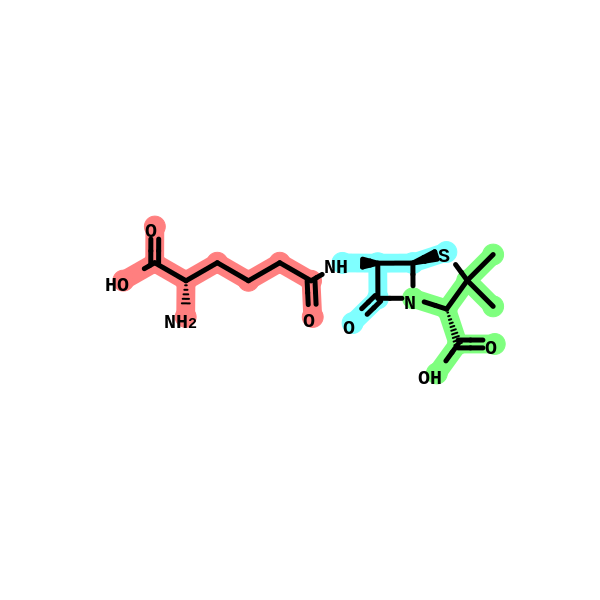

In [8]:
# Display the first image

display_png(Image('./output/' + test1.name + '/0.png'))

In [0]:
bu_info = test1.output_matched_bu(result_id=0)

Biosynthetic Unit IDs:
['C00956_01', 'C01251_04']


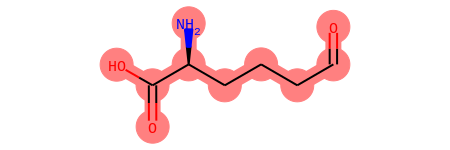

In [10]:
n = 0

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

### If you want to get the information of this biosynthetic unit, please access [KEGG COMPOUND database](https://www.genome.jp/kegg/compound/).
  
C00956_01 → C00956  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00956 ★  
  
C01251_04 → C01251  
https://www.genome.jp/dbget-bin/www_bget?cpd:C01251

Biosynthetic Unit IDs:
['C00183_02']


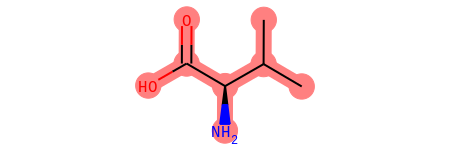

In [11]:
n = 1

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

C00183_02 → C00183  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00183

Biosynthetic Unit IDs:
['C00097_06']


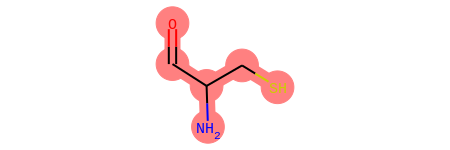

In [12]:
n = 2

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

C00097_06 → C00097  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00097

***

##  Test2: [Dihydroclavaminic acid](https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:15424)
## Input a query in the SMILES representation

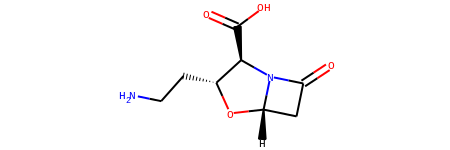

In [13]:
# Create an instance and input a query molecule

test2 = medi.MetaDisassembler()
test2.input_query('[H][C@]12CC(=O)N1[C@@H]([C@@H](CCN)O2)C(O)=O')
test2.cpds[0].mol

In [14]:
# Disassemble the query molecule
# It takes about 2 min.

test2.disassemble()

Finished.


True

In [15]:
# List output files

sorted(glob.glob('./output/' + test2.name + '/*'))

['./output/C8H12N2O4/0.png',
 './output/C8H12N2O4/1.png',
 './output/C8H12N2O4/10.png',
 './output/C8H12N2O4/2.png',
 './output/C8H12N2O4/3.png',
 './output/C8H12N2O4/4.png',
 './output/C8H12N2O4/5.png',
 './output/C8H12N2O4/6.png',
 './output/C8H12N2O4/7.png',
 './output/C8H12N2O4/8.png',
 './output/C8H12N2O4/9.png',
 './output/C8H12N2O4/C8H12N2O4.mol',
 './output/C8H12N2O4/result.txt']

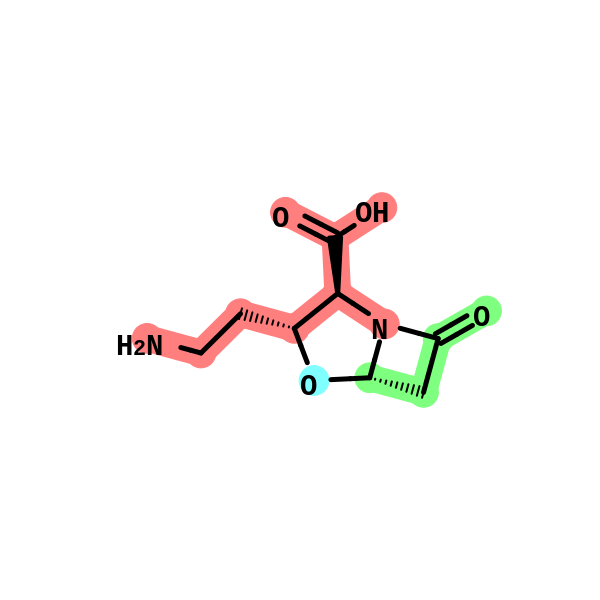

In [16]:
# Display the first image

display_png(Image('./output/' + test2.name + '/0.png'))

In [0]:
bu_info = test2.output_matched_bu(result_id=0)

Biosynthetic Unit IDs:
['C00062_01', 'C00077']


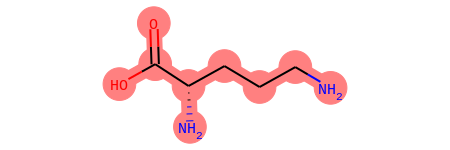

In [18]:
n = 0

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C00062 ★  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00077  

Biosynthetic Unit IDs:
['C00109_04', 'C00118_05', 'C00546_01']


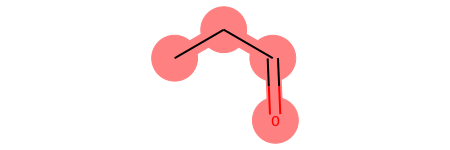

In [19]:
n = 1

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C00109  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00118 ★  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00546  

Biosynthetic Unit IDs:
['O']


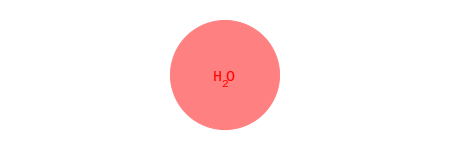

In [20]:
n = 2

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

***

## Test3: [Curcumin diglucoside](https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:81315)
## Input a query in InChI format

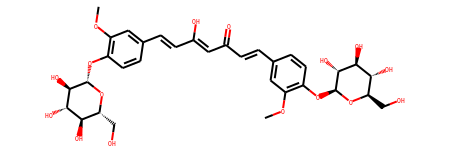

In [21]:
# Create an instance and input a query molecule

test3 = medi.MetaDisassembler()
test3.input_query('InChI=1S/C33H40O16/c1-44-22-11-16(5-9-20(22)46-32-30(42)28(40)26(38)24(14-34)48-32)3-7-18(36)13-19(37)8-4-17-6-10-21(23(12-17)45-2)47-33-31(43)29(41)27(39)25(15-35)49-33/h3-13,24-36,38-43H,14-15H2,1-2H3/b7-3+,8-4+,18-13-/t24-,25-,26-,27-,28+,29+,30-,31-,32-,33-/m1/s1')
test3.cpds[0].mol

In [22]:
# Disassemble the query molecule

test3.disassemble()

Finished.


True

In [23]:
# List output files

sorted(glob.glob('./output/' + test3.name + '/*'))

['./output/C33H40O16/0.png',
 './output/C33H40O16/1.png',
 './output/C33H40O16/10.png',
 './output/C33H40O16/11.png',
 './output/C33H40O16/12.png',
 './output/C33H40O16/13.png',
 './output/C33H40O16/2.png',
 './output/C33H40O16/3.png',
 './output/C33H40O16/4.png',
 './output/C33H40O16/5.png',
 './output/C33H40O16/6.png',
 './output/C33H40O16/7.png',
 './output/C33H40O16/8.png',
 './output/C33H40O16/9.png',
 './output/C33H40O16/C33H40O16.mol',
 './output/C33H40O16/result.txt']

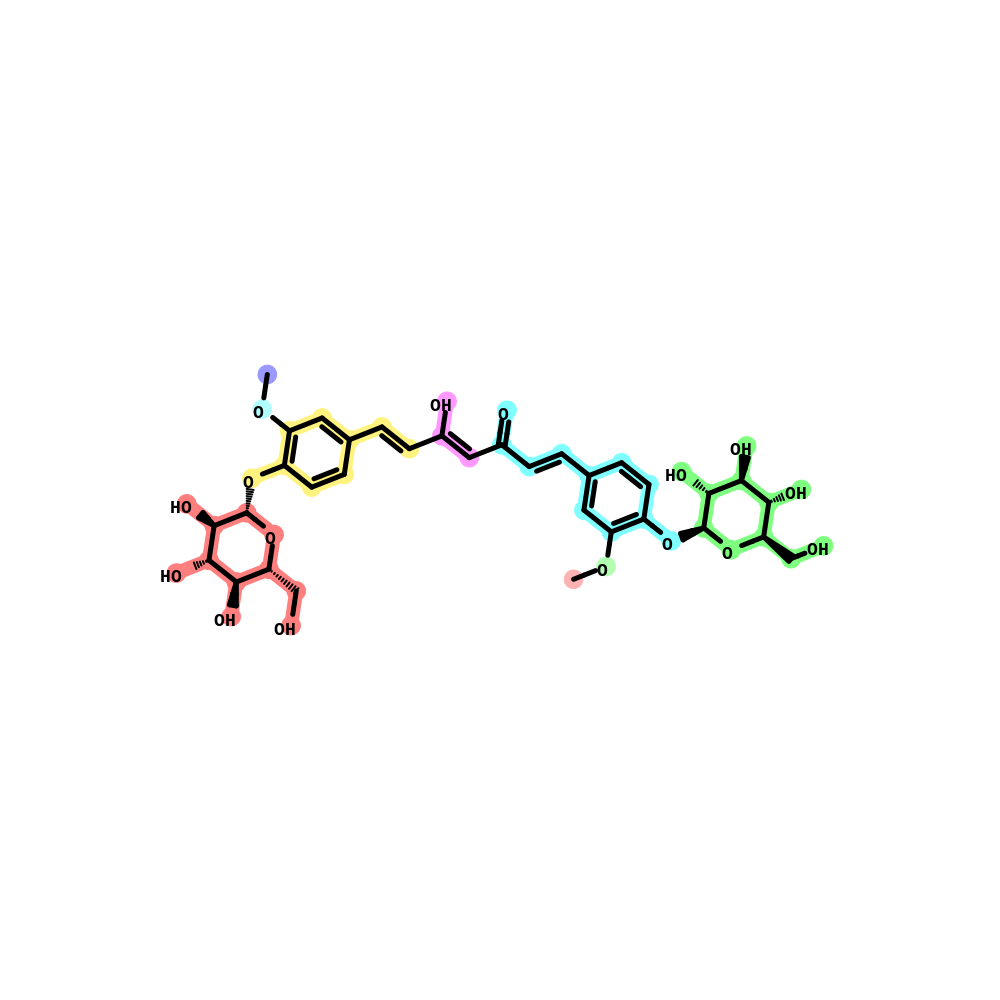

In [24]:
# Display the first image

display_png(Image('./output/' + test3.name + '/0.png'))

In [0]:
bu_info = test3.output_matched_bu(result_id=0)

Biosynthetic Unit IDs:
['C00029_04', 'C00031_05']


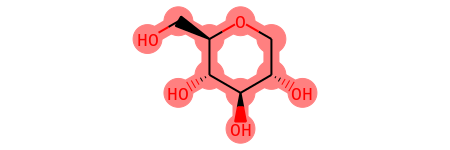

In [26]:
n = 0

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C00029  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00031 ★  

Biosynthetic Unit IDs:
['C00223_01', 'C00811_01']


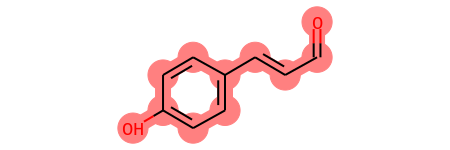

In [27]:
n = 2

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C00223 ★  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00811  

Biosynthetic Unit IDs:
['C00223_07']


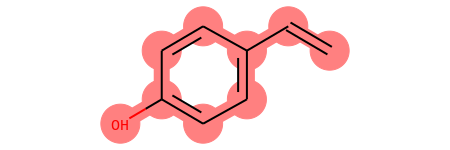

In [28]:
n = 3

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C00223

Biosynthetic Unit IDs:
['C00083_03']


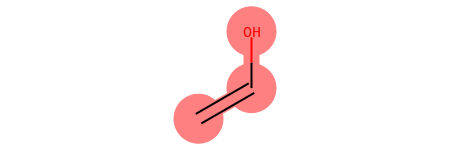

In [29]:
n = 4

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C00083

***

## Test4: [C00011250 Fumigaclavine C](http://kanaya.naist.jp/knapsack_jsp/information.jsp?word=C00011250)
## Input a query by the KNApSAcK  compound identifier

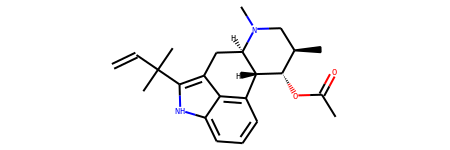

In [30]:
# Create an instance and input a query molecule

test4 = medi.MetaDisassembler()
test4.input_query('C00011250')
test4.cpds[0].mol

In [31]:
# Disassemble the query molecule

test4.disassemble()

Finished.


True

In [32]:
# List output files

sorted(glob.glob('./output/' + test4.name + '/*'))

['./output/C00011250/0.png',
 './output/C00011250/1.png',
 './output/C00011250/2.png',
 './output/C00011250/3.png',
 './output/C00011250/4.png',
 './output/C00011250/5.png',
 './output/C00011250/C00011250.mol',
 './output/C00011250/result.txt']

### The result at the top (" 0.png ") is not necessarily the correct combination.  
### In this case, the most correct one is the third result (" 2.png ").

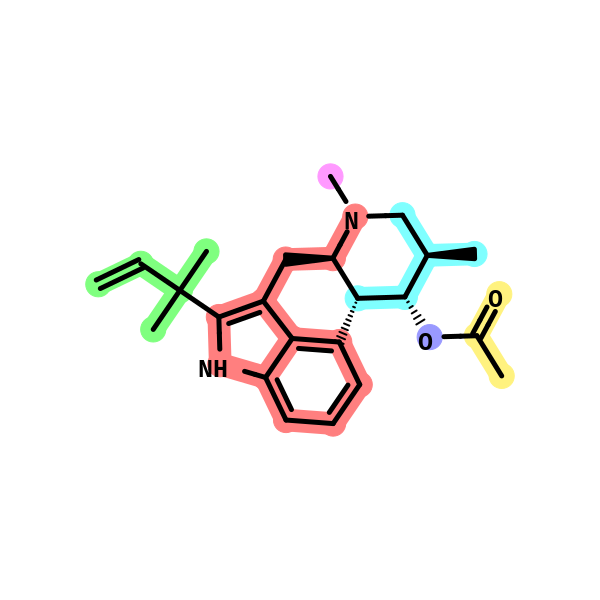

In [33]:
# Display the "third" image

display_png(Image('./output/' + test4.name + '/2.png'))

In [0]:
bu_info = test4.output_matched_bu(result_id=2)

Biosynthetic Unit IDs:
['C00078_01', 'C00398']


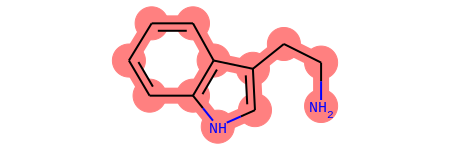

In [35]:
n = 0

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C00078 ★  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00398  

Biosynthetic Unit IDs:
['C16521_05']


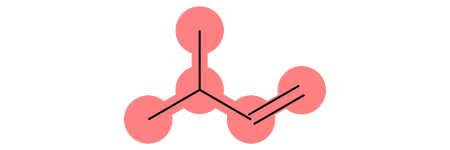

In [36]:
n = 1

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C16521

Biosynthetic Unit IDs:
['C16521_04']


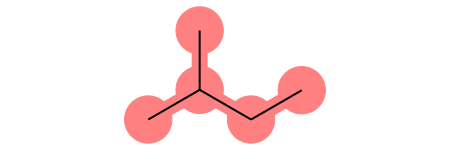

In [37]:
n = 2

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C16521

Biosynthetic Unit IDs:
['C00022_01', 'C00024_01', 'C00083_04', 'C00084']


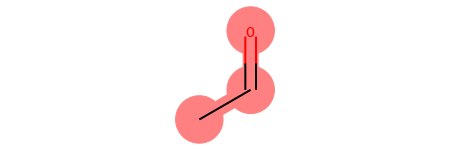

In [38]:
n = 3

print('Biosynthetic Unit IDs:')
print(bu_info[n]['bu_id'])

bu_info[n]['mol']

https://www.genome.jp/dbget-bin/www_bget?cpd:C00022  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00024 ★  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00083  
https://www.genome.jp/dbget-bin/www_bget?cpd:C00084  

***

## Save files to your local computer

In [39]:
!zip -r /content/result.zip /content/output

  adding: content/output/ (stored 0%)
  adding: content/output/C00011250/ (stored 0%)
  adding: content/output/C00011250/result.txt (deflated 77%)
  adding: content/output/C00011250/3.png (deflated 4%)
  adding: content/output/C00011250/C00011250.mol (deflated 78%)
  adding: content/output/C00011250/2.png (deflated 4%)
  adding: content/output/C00011250/4.png (deflated 4%)
  adding: content/output/C00011250/5.png (deflated 4%)
  adding: content/output/C00011250/1.png (deflated 4%)
  adding: content/output/C00011250/0.png (deflated 4%)
  adding: content/output/C33H40O16/ (stored 0%)
  adding: content/output/C33H40O16/10.png (deflated 8%)
  adding: content/output/C33H40O16/12.png (deflated 8%)
  adding: content/output/C33H40O16/C33H40O16.mol (deflated 84%)
  adding: content/output/C33H40O16/result.txt (deflated 87%)
  adding: content/output/C33H40O16/3.png (deflated 8%)
  adding: content/output/C33H40O16/7.png (deflated 9%)
  adding: content/output/C33H40O16/13.png (deflated 8%)
  adding

In [0]:
from google.colab import files

files.download('/content/result.zip')